In [6]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
    # initialize the input shape and channel dimension, assuming
    # TensorFlow/channels-last ordering
    inputShape = (height, width, depth)
    chanDim = -1
    # define the model input
    inputs = Input(shape=inputShape)
    # loop over the number of filters
    for (i, f) in enumerate(filters):
        # if this is the first CONV layer then set the input
        # appropriately
        if i == 0:
            x = inputs
        # CONV => RELU => BN => POOL
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        
        # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    x = Dense(16)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)
    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    x = Dense(4)(x)
    x = Activation("relu")(x)
    # check to see if the regression node should be added
    if regress:
        x = Dense(1, activation="relu")(x)
    # construct the CNN
    model = Model(inputs, x)
    # return the CNN
    return model

In [7]:
from tensorflow.keras.optimizers import Adam
import numpy as np
import argparse
import locale
import os

In [8]:
import pandas as pd

df = pd.read_csv('set/labels_4k.csv', sep=',', header=None)
df.columns = ['NAME','MAX_BID_USD']

norm = True
if norm:
    x_std = df["MAX_BID_USD"].std()
    x_mean = df["MAX_BID_USD"].mean()
    
    df["MAX_BID_USD"]=(df["MAX_BID_USD"]-df["MAX_BID_USD"].mean())/df["MAX_BID_USD"].std()
    #min_max_normalized_df=(df-df.min())/(df.max()-df.min())

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras import optimizers


datagen=ImageDataGenerator(rescale=1./255)
input_h,input_w = 300, 300

train_generator = datagen.flow_from_dataframe(dataframe=df, 
                                              directory=r"C:\Users\sondors\Desktop\hack\set\img_4k", 
                                               x_col="NAME", y_col="MAX_BID_USD", 
                                               class_mode="raw", 
                                               target_size=(input_h,input_w), 
                                               batch_size=10)

Found 3965 validated image filenames.


In [11]:
model = create_cnn(input_h, input_w, 3, regress=True)
opt = 'rmsprop'# Adam(lr=1e-2, decay=1e-2)#'rmsprop'#
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=20)

  ...
    to  
  ['...']
Train for 396 steps
Epoch 1/20
396/396 [==============================] - 13s 33ms/step - loss: 4130.0789
Epoch 2/20
396/396 [==============================] - 12s 29ms/step - loss: 208.6258 6s - loss: 3 - ET
Epoch 3/20
396/396 [==============================] - 12s 29ms/step - loss: 112.1351
Epoch 4/20
396/396 [==============================] - 12s 29ms/step - loss: 102.5807
Epoch 5/20
396/396 [==============================] - 12s 29ms/step - loss: 101.1947
Epoch 6/20
396/396 [==============================] - 12s 29ms/step - loss: 100.0565- ETA: 
Epoch 7/20
396/396 [==============================] - 12s 29ms/step - loss: 101.3170 4s  - ETA: 3s - loss: 101. - ETA: 3s - loss: 101. - ETA - ETA: 0s - loss: 1
Epoch 8/20
396/396 [==============================] - 12s 29ms/step - loss: 101.0325 6s - loss: 101. - ETA: - ETA:  - ETA: 0s - loss: 
Epoch 9/20
396/396 [==============================] - 12s 29ms/step - loss: 102.0382
Epoch 10/20
396/396 [=================

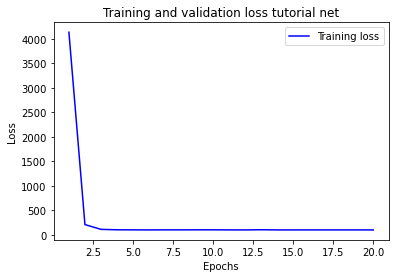

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']

#val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
#plt.plot(epochs, val_loss_values, 'bo', label='Validation loss')
plt.title('Training and validation loss tutorial net')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

for i in range(100):
    img_path = r'C:\Users\sondors\Desktop\hack\set\img_4k\{}.jpg'.format(i)

    img = image.load_img(img_path, target_size=(300, 300))

    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    
    x = model.predict(img_batch)[0][0]
    x = x * x_std + x_mean
    print('{}.jpg'.format(i), x, '$')

0.jpg 7092.949760041451 $
1.jpg 7092.949760041451 $
2.jpg 7092.949760041451 $
3.jpg 7092.949760041451 $
4.jpg 7092.949760041451 $
5.jpg 7092.949760041451 $
6.jpg 7092.949760041451 $
7.jpg 7092.949760041451 $
8.jpg 7092.949760041451 $
9.jpg 7092.949760041451 $
10.jpg 7092.949760041451 $
11.jpg 7092.949760041451 $
12.jpg 7092.949760041451 $
13.jpg 7092.949760041451 $
14.jpg 7092.949760041451 $
15.jpg 7092.949760041451 $
16.jpg 7092.949760041451 $
17.jpg 7092.949760041451 $
18.jpg 7092.949760041451 $
19.jpg 7092.949760041451 $
20.jpg 7092.949760041451 $
21.jpg 7092.949760041451 $
22.jpg 7092.949760041451 $
23.jpg 7092.949760041451 $
24.jpg 7092.949760041451 $
25.jpg 7092.949760041451 $
26.jpg 7092.949760041451 $
27.jpg 7092.949760041451 $
28.jpg 7092.949760041451 $
29.jpg 7092.949760041451 $
30.jpg 7092.949760041451 $
31.jpg 7092.949760041451 $
32.jpg 7092.949760041451 $
33.jpg 7092.949760041451 $
34.jpg 7092.949760041451 $
35.jpg 7092.949760041451 $
36.jpg 7092.949760041451 $
37.jpg 7092

In [14]:
x_mean

7092.949760041451